# Property with lowest review

This is my first Udacity project. In this project, I want to know about the property type with the lowest review rating. Some of the questions I ask are:

1. Which property has the lowest review rating?
2. What about the prices on each property? Does the rental price of the property that has the lowest rating also have the lowest price?
3. From the lowest property data, which review is the lowest? What needs to be fixed?

data used comes from Seattle Airbnb:
https://www.kaggle.com/datasets/airbnb/seattle?select=listings.csv

## Prepare Data
- Gather necessary data to answer your questions
- Handle categorical and missing data
- Provide insight into the methods you chose and why you chose them

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('listings.csv')
df.head(5)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3585 non-null   int64  
 1   listing_url                       3585 non-null   object 
 2   scrape_id                         3585 non-null   int64  
 3   last_scraped                      3585 non-null   object 
 4   name                              3585 non-null   object 
 5   summary                           3442 non-null   object 
 6   space                             2528 non-null   object 
 7   description                       3585 non-null   object 
 8   experiences_offered               3585 non-null   object 
 9   neighborhood_overview             2170 non-null   object 
 10  notes                             1610 non-null   object 
 11  transit                           2295 non-null   object 
 12  access

### Columns that I need:
-	Price
-	Property_type
-	review_scores_rating    
-	review_scores_accuracy            
-	review_scores_cleanliness         
-	review_scores_checkin             
-	review_scores_communication       
-	review_scores_location            
-	review_scores_value     

In [82]:
df_1 = df[['property_type', 'price', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']]
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   property_type                3582 non-null   object 
 1   price                        3585 non-null   object 
 2   review_scores_rating         2772 non-null   float64
 3   review_scores_accuracy       2762 non-null   float64
 4   review_scores_cleanliness    2767 non-null   float64
 5   review_scores_checkin        2765 non-null   float64
 6   review_scores_communication  2767 non-null   float64
 7   review_scores_location       2763 non-null   float64
 8   review_scores_value          2764 non-null   float64
dtypes: float64(7), object(2)
memory usage: 252.2+ KB


### Handle categorical and missing data

In [83]:
#mean column with missing data
print('price =', df['price'].isnull().mean())
print('property_type =', df['property_type'].isnull().mean())
print('rating =', df['review_scores_rating'].isnull().mean())
print('accuracy =', df['review_scores_accuracy'].isnull().mean())
print('cleanliness =', df['review_scores_cleanliness'].isnull().mean())
print('communication =', df['review_scores_communication'].isnull().mean())
print('location =', df['review_scores_location'].isnull().mean())
print('value =', df['review_scores_value'].isnull().mean())

price = 0.0
property_type = 0.0008368200836820083
rating = 0.22677824267782426
accuracy = 0.2295676429567643
cleanliness = 0.22817294281729428
communication = 0.22817294281729428
location = 0.2292887029288703
value = 0.2290097629009763


In [84]:
#drop data with missing value
df_1_nonulls = df_1.dropna(axis = 0)

print(df_1.shape, df_1_nonulls.shape)


(3585, 9) (2755, 9)


In [112]:
#change price from str to int and make categorical the price with new label:
#the laber is A (0 - 100), B (100 - 200), C (200 - 300), D (300 - 400), E (400 - 500), F (500 - 600),
#G (600 - 700), H (700 - 800), I (800 - 900), J (900 - 1000), K (>1000)

#df = df[(df['col'] < -0.25) | (df['col'] > 0.25)]

df_1_nonulls['price2'] = df_1_nonulls['price'].str.replace('$','').str.replace(',', '').astype(float)
df_1_nonulls['price2']


C:\Users\SESILIA\AppData\Local\Temp\ipykernel_19148\633303034.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_1_nonulls['price2'] = df_1_nonulls['price'].str.replace('$','').str.replace(',', '').astype(float)
C:\Users\SESILIA\AppData\Local\Temp\ipykernel_19148\633303034.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1_nonulls['price2'] = df_1_nonulls['price'].str.replace('$','').str.replace(',', '').astype(float)


1       65.0
2       65.0
3       75.0
4       79.0
5       75.0
        ... 
3574    68.0
3575    69.0
3578    85.0
3580    69.0
3583    65.0
Name: price2, Length: 2755, dtype: float64

In [111]:
df_1_nonulls['price_cate']=pd.cut(df_1_nonulls['price2'], [0,100,200,300,400,500,600,700,800,900,1000], labels = ['A','B','C','D','E','F','G','H','I','J'])
df_1_nonulls['price_cate'].head(10)

C:\Users\SESILIA\AppData\Local\Temp\ipykernel_19148\3614015342.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1_nonulls['price_cate']=pd.cut(df_1_nonulls['price2'], [0,100,200,300,400,500,600,700,800,900,1000], labels = ['A','B','C','D','E','F','G','H','I','J'])


1     A
2     A
3     A
4     A
5     A
6     A
7     A
8     A
9     C
10    A
Name: price_cate, dtype: category
Categories (10, object): ['A' < 'B' < 'C' < 'D' ... 'G' < 'H' < 'I' < 'J']

### Provide insight into the methods you chose and why you chose them

From the existing data, I want to know the type of property with the lowest level of satisfaction. By knowing which position is the lowest, I can provide insight to homeowners to correct these deficiencies so that it will increase customer satisfaction which also has an impact on increasing income.

## Analyze, Model, and Visualize

Provide a clear connection between the business questions and how the data answers them.


### Question 1 - 2
1. Which property has the lowest review rating?
2. What about the prices on each property? Does the rental price of the property that has the lowest rating also have the lowest price?

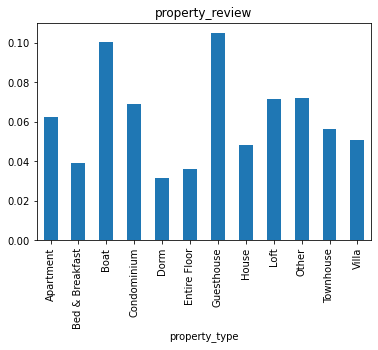

In [118]:
def barplot(column_name, y):
    '''
    this function provide the counts for each series in column and plot it in bar plot
    
    input:
    column_name
    y = column_thatgroupby
    
    output:
    plt bar plot of value counts
    '''
    vals = df_1_nonulls.groupby(['property_type']).mean()[y]
    (vals/df_1_nonulls.shape[0]).plot(kind="bar")
    plt.title(column_name)

property_review = barplot('property_review', 'review_scores_rating')
property_price = barplot('property_review', 'price2')

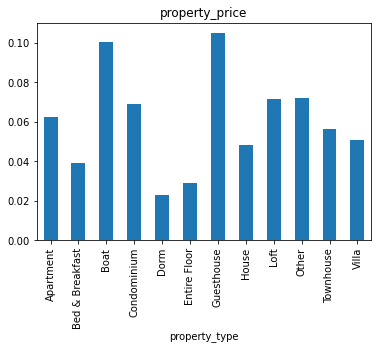

In [119]:
property_price = barplot('property_price', 'price2')

#### conclution 1:

From the bar chart "Review rating per property type" shows that the lowest review is Dorm with a review rating of 86.5 points. Then the second lowest is occupied by Others. The difference in review points between Dorm and Others is considered not too far, which is 1.8 points. Meanwhile, the highest review rating is owned by Entire Floor and Guesthouse.
When viewed from the price, Type property Dorm also has the lowest price, with an average of $ 62.5 per night. Entire Floor is in the second lowest price position with an average price of $80 per night. This shows that the Dorm property type needs to be improved to increase customer satisfaction. Next, from several types of reviews consisting of accuracy, cleanliness, value, check-in, communication, and location, we will find out improvements that need to be made by Dorm owners to increase customer satisfaction.


### Question 3

3. From the lowest property data, which review is the lowest? What needs to be fixed?

In [120]:
from matplotlib import style

dorm_accuracy = df_1_nonulls.query('property_type == "Dorm"').mean()['review_scores_accuracy']
dorm_cleanliness = df_1_nonulls.query('property_type == "Dorm"').mean()['review_scores_cleanliness']
dorm_checkin = df_1_nonulls.query('property_type == "Dorm"').mean()['review_scores_checkin']
dorm_communication = df_1_nonulls.query('property_type == "Dorm"').mean()['review_scores_communication']
dorm_location = df_1_nonulls.query('property_type == "Dorm"').mean()['review_scores_location']
dorm_value = df_1_nonulls.query('property_type == "Dorm"').mean()['review_scores_value']

C:\Users\SESILIA\AppData\Local\Temp\ipykernel_19148\2907278698.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dorm_accuracy = df_1_nonulls.query('property_type == "Dorm"').mean()['review_scores_accuracy']
C:\Users\SESILIA\AppData\Local\Temp\ipykernel_19148\2907278698.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dorm_cleanliness = df_1_nonulls.query('property_type == "Dorm"').mean()['review_scores_cleanliness']
C:\Users\SESILIA\AppData\Local\Temp\ipykernel_19148\2907278698.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select 

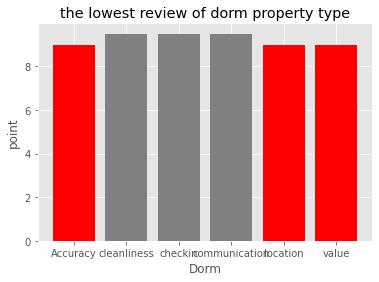

In [38]:
style.use('ggplot')

x = [1, 2, 3, 4, 5, 6]
y = [dorm_accuracy, dorm_cleanliness, dorm_checkin, dorm_communication, dorm_location, dorm_value] 
color = ['red', 'grey', 'grey', 'grey', 'red', 'red']
fig, ax = plt.subplots()

ax.bar(x, y, align='center', color=color)

ax.set_title('the lowest review of dorm property type')
ax.set_ylabel('point')
ax.set_xlabel('Dorm')

ax.set_xticks(x)
ax.set_xticklabels(("Accuracy", "cleanliness", "checkin", "communication", "location", "value"))

plt.show()

#### conclution 2 :
Reviews of accuracy, location, and value are the lowest reviews from the dorm with an average review of 9.0. This can be considered by the dorm owner to improve the information provided to prospective tenants more accurately and provide even better facilities and services. As for the location, although it cannot be repaired directly, the dorm owner can add transportation services as additional facilities for prospective tenants.